In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Project 1 - Exploring prisoner data

### 1. Data Loading:

a. Load the dataset “prisoners.csv” using pandas and display the first and last five rows
in the dataset.
[Hint: Refer to read_csv, head and tail methods in pandas]

In [2]:
df1 = pd.read_csv('prisoners.csv')
df1.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
0,Andhra Pradesh,2013,9480,13758,672,170
1,Arunachal Pradesh,2013,0,0,0,0
2,Assam,2013,676,750,14,30
3,Bihar,2013,1693,3013,125,1417
4,Chhatisgarh,2013,1664,1803,192,103


In [3]:
df1.tail()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
30,D & N Haveli,2013,0,0,0,0
31,Daman & Diu,2013,0,0,0,0
32,Delhi,2013,1458,1187,908,174
33,Lakshadweep,2013,0,0,0,0
34,Pondicherry,2013,0,0,0,0


b. Use describe method in pandas and find out the number of columns. Can you say
something about those rows who have zero inmates?
[Hint: Use the loc attribute of dataframe combined with conditional checks]

In [4]:
df1.describe()

,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
count,35.0,35.000000,35.000000,35.000000,35.000000
mean,2013.0,1057.914286,1534.857143,237.457143,210.171429
std,0.0,2078.196777,3022.110503,375.614191,359.117340
min,2013.0,0.000000,0.000000,0.000000,0.000000
25%,2013.0,0.000000,6.500000,2.000000,0.000000
50%,2013.0,167.000000,237.000000,33.000000,38.000000
75%,2013.0,1294.500000,1733.500000,234.500000,227.500000
max,2013.0,9480.000000,13758.000000,1353.000000,1417.000000


In [5]:
df2 = df1[['No. of Inmates benefitted by Elementary Education', 'No. of Inmates benefitted by Adult Education', 'No. of Inmates benefitted by Higher Education', 'No. of Inmates benefitted by Computer Course']]
df2.sum(axis=1).sort_values()

34        0
1         0
31        0
30        0
22        0
18        0
33        0
15        0
16       31
24       34
17       43
5       101
8       139
28      223
9       293
26      348
29      350
12      526
20     1211
11     1383
21     1389
2      1470
19     1896
23     2967
7      3260
32     3727
4      3762
27     4495
14     5301
3      6248
10     6315
6      7284
13    12004
25    17534
0     24080
dtype: int64

### 2. Data Manipulation:

a. Create a new column -’total_benefitted’ that is a sum of inmates benefitted through all
modes.
[Hint: Use sum method with appropriate axis]

In [6]:
df1['total_benefitted']=df1[[
    'No. of Inmates benefitted by Elementary Education', 
'No. of Inmates benefitted by Adult Education', 
'No. of Inmates benefitted by Higher Education', 
'No. of Inmates benefitted by Computer Course']].sum(axis=1)
df1.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total_benefitted
0,Andhra Pradesh,2013,9480,13758,672,170,24080
1,Arunachal Pradesh,2013,0,0,0,0,0
2,Assam,2013,676,750,14,30,1470
3,Bihar,2013,1693,3013,125,1417,6248
4,Chhatisgarh,2013,1664,1803,192,103,3762


b. Create a new row - “totals” that is the sum of all inmates benefitted through each
mode across all states.

In [16]:
df1.append(df1[[
    'No. of Inmates benefitted by Elementary Education', 
'No. of Inmates benefitted by Adult Education', 
'No. of Inmates benefitted by Higher Education', 
'No. of Inmates benefitted by Computer Course', 
'total_benefitted']].sum(), ignore_index=True).tail()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total_benefitted
31,Daman & Diu,2013.0,0.0,0.0,0.0,0.0,0.0
32,Delhi,2013.0,1458.0,1187.0,908.0,174.0,3727.0
33,Lakshadweep,2013.0,0.0,0.0,0.0,0.0,0.0
34,Pondicherry,2013.0,0.0,0.0,0.0,0.0,0.0
35,NaN,NaN,37027.0,53720.0,8311.0,7356.0,106414.0


### 3. Plotting:

a. Make a bar plot with each state name on the x -axis and their total benefitted inmates
as their bar heights. Which state has the maximum number of beneficiaries?
[Hint: Use bar method of pyplot]

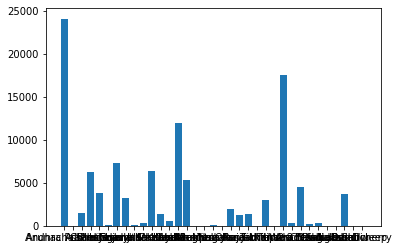

In [17]:
plt.bar(df1['STATE/UT'], df1['total_benefitted'])
plt.show()

In [20]:
df1.sort_values('total_benefitted', ascending=False).iloc[0][0]

'Andhra Pradesh'

b. Make a pie chart that depicts the ratio among different modes of benefits.
[Hint: Use pie method of pyplot]

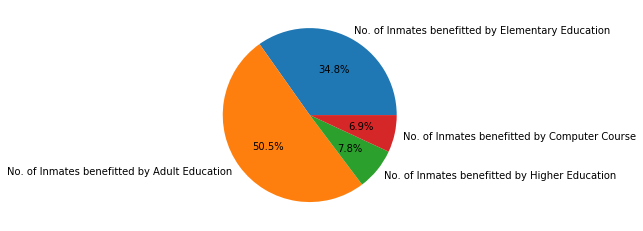

In [36]:
s1 = df1[['No. of Inmates benefitted by Elementary Education', 
          'No. of Inmates benefitted by Adult Education', 
          'No. of Inmates benefitted by Higher Education', 
          'No. of Inmates benefitted by Computer Course']].sum()
labels = 'No. of Inmates benefitted by Elementary Education', 'No. of Inmates benefitted by Adult Education', 'No. of Inmates benefitted by Higher Education', 'No. of Inmates benefitted by Computer Course'
plt.pie(s1, labels=labels, autopct='%1.1f%%')
plt.show()

## Project 2 - Exploring cereal dataset

### 1. Data Loading:

Load the data from “cereal.csv” and plot histograms of sugar and vitamin content across
different cereals.
[Hint: Extract values of a specific column using their labels and use hist method of pyplot]

In [49]:
df2 = pd.read_csv('cereal.csv')
df2.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


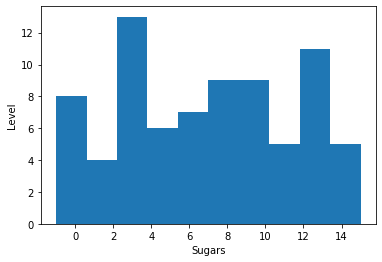

In [62]:
plt.hist(df2['sugars'], bins=10)
plt.xlabel('Sugars')
plt.ylabel('Level')
plt.show()

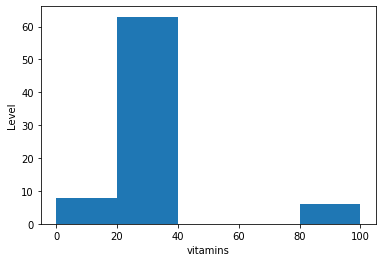

In [61]:
plt.hist(df2['vitamins'], bins=5)
plt.xlabel('vitamins')
plt.ylabel('Level')
plt.show()

### 2. Data Manipulation:

● The names of the manufactures are coded using alphabets, create a new column
with their full name using the below mapping.

In [63]:
d = {'N': 'Nabisco', 'Q': 'Quaker Oats', 'K': 'Kelloggs', 'R': 'Raslston Purina', 'G': 'General Mills' , 'P' :'Post' , 'A':'American Home Foods Products'}
df2['manufacturer'] = df2['mfr'].map(d)
df2.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,manufacturer
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina


● Create a bar plot where each manufacturer is on the y axis and the height of the bars depict the number of cereals manufactured by them.
[Hint: Try using countplot this time or bar method of pyplot]

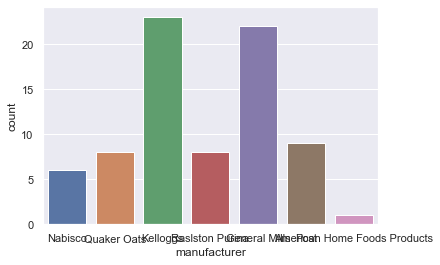

In [64]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="manufacturer", data=df2)

● Extract the rating as your target variable ‘y’ and all numerical parameters as your predictors ‘x’. Separate 25% of your data as test set.

In [74]:
features = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']
target = ['rating']

# Spliting
split = int(len(df2)*(75/100))
X = df2[features]
Y = df2[target]

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

### 2. Training and testing:

Fit a linear regression module and measure the mean squared error on test dataset.
[ Hint: Explore linear models and metrics section of sklearn documentation]

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
reg = LinearRegression().fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.999999999999999

In [78]:
from sklearn.metrics import mean_squared_error

In [85]:
Y_pred = LinearRegression.predict(reg, X_test)

In [86]:
mean_squared_error(Y_test, Y_pred)

1.7605796376052303e-13

## Project 3:

1. Compute and use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Is there a correlation?

In [87]:
df3 = pd.read_csv('FyntraCustomerData.csv')
df3.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


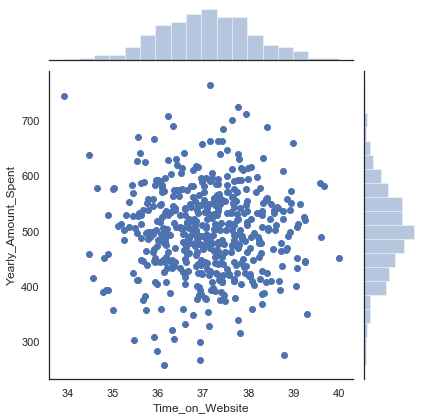

In [88]:
sns.set(style="white", color_codes=True)
g = sns.jointplot(x='Time_on_Website', y='Yearly_Amount_Spent', data=df3[['Time_on_Website', 'Yearly_Amount_Spent']])

2. Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1st One?

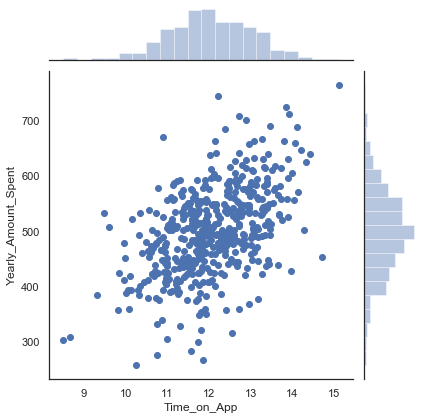

In [89]:
g = sns.jointplot(x='Time_on_App', y='Yearly_Amount_Spent', data=df3[['Time_on_App', 'Yearly_Amount_Spent']])

3. Compute and explore types of relationships across the entire data set using pairplot. Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

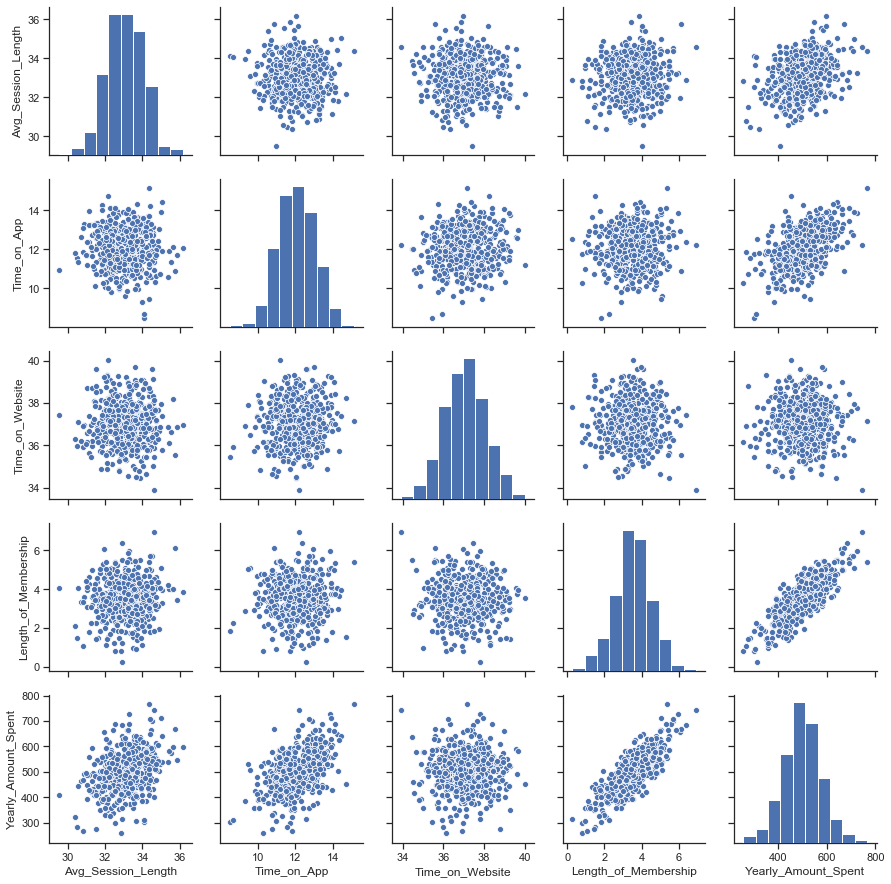

In [90]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df3)

#### length of membership seems to be most correlated to yearly amount spent

4. Compute and create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot?

In [91]:
features = ['Length_of_Membership']
target = ['Yearly_Amount_Spent']

# Spliting
split = int(len(df3)*(75/100))
X = df3[features]
Y = df3[target]

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

reg = LinearRegression().fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.6801686747813415

#### It doesn't fit well in linear regression model

5. Using sklearn. train_test_split to split the data -- What is the use of random_state=85?

In [92]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=85)

random_state is the seed used by the random number generator

5. Train and Test the data and answer multiple questions

In [112]:
reg = LinearRegression().fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.6385122637037487

In [113]:
Y_pred = LinearRegression.predict(reg, X_test)

In [120]:
from sklearn.metrics import r2_score
print('Coefficients: ', LinearRegression.score(reg, X_test, Y_test))
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Coefficients:  0.6385122637037487
Mean squared error: 1800.69
Variance score: 0.64


6. Compute the predict the data and do a scatter plot. Check if actual and predicted data match?

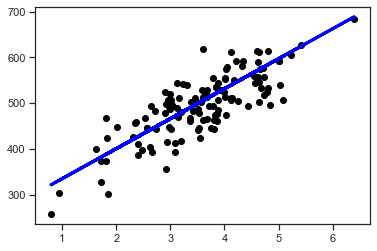

In [122]:
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
plt.show()

7. What is the value of Root Mean Squared Error?

In [124]:
Root_Mean_Squared_Error = np.sqrt(mean_squared_error(Y_test, Y_pred))
Root_Mean_Squared_Error

42.43453879872978